In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pathlib import Path
from PIL import Image

Initial transformations

In [57]:
images_folder = Path("dog-breed-identification")
train_images_folder = images_folder / "train"
train_resized_folder = images_folder / "train_resized"

test_images_folder = images_folder / "test"

labels_path = Path("dog-breed-identification/labels.csv")

In [68]:
image_size = (200, 200)

In [58]:
from progress_bar import printProgressBar
from itertools import count


def read_image_for_id(id, folder=train_images_folder):
    image_path = list(folder.glob(f"{id}.jpg"))[0]
    return Image.open(image_path)

In [59]:
data_labels = pd.read_csv(labels_path)

In [60]:
data_labels.sample(5)

,id,breed
9630,f2580ac6cf1bb3317c661133fc3bc7b6,blenheim_spaniel
3525,57bce5e34f5f57d13e8136f578a522eb,tibetan_terrier
6679,a7a3e358844d4ae4d423b2754c1d54a4,norwich_terrier
5540,8bef88134879b7794217700319b25561,bull_mastiff
5133,819940dffd7ba189b45a4aa8e06d728a,schipperke


In [61]:
data_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,2d48dfbeb942e43157564559e4fb3ff6,scottish_deerhound
freq,1,126


In [62]:
data_labels['breed'] = data_labels['breed'].astype('category')

In [63]:
data_labels['breed']

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: category
Categories (120, object): ['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', ..., 'west_highland_white_terrier', 'whippet', 'wire-haired_fox_terrier', 'yorkshire_terrier']

In [64]:
data_labels['breed'].cat.categories

Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)

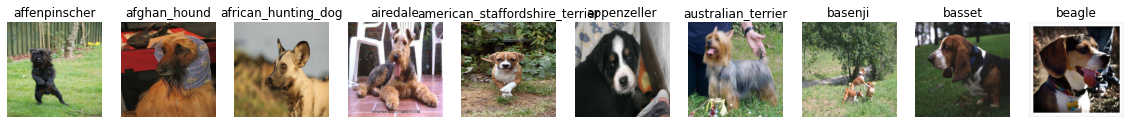

In [69]:
labels = data_labels['breed'].cat.categories[:10]
fig, axes = plt.subplots(1, 10)
fig.set_size_inches(20, 5)


for ax, label in zip(axes, labels):
    sample = data_labels[data_labels['breed'] == label].sample(1)
    
    ax.imshow(read_image_for_id(sample.iloc[0]['id']).resize(image_size))
    ax.axis('off')
    ax.set_title(label)

In [66]:
category_folders = {}

for category in data_labels['breed'].cat.categories:
    new_folder = train_resized_folder / category
    category_folders[category] = new_folder
    if not new_folder.exists():
        new_folder.mkdir(parents=True)

In [ ]:
# resize all images and save them to folders with specific labels for later use
from skimage.io import imread, imsave
from skimage.transform import resize
from progress_bar import printProgressBar


total_labels = len(data_labels)

for index, row in data_labels.iterrows():
    img = resize(imread(train_images_folder / f"{row['id']}.jpg"), image_size)
    
    save_folder = category_folders[row['breed']] / f"{row['id']}.jpg"
    imsave(save_folder, (img * 255).astype('uint8'), quality=50)

    printProgressBar(index, total_labels, prefix="Reading files", printEnd='')

Preparing dataset